# Exploratory Data Analysis for Brent Oil Prices

This notebook performs EDA on Brent oil price data to understand its properties (e.g., trend, stationarity) and inform modeling choices.

c:\Users\hp\Desktop\projects\10 Acadamy -KAIM5\brent-oil-changepoint-analysis\notebooks\..\src\data\data_loader.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(date_series)


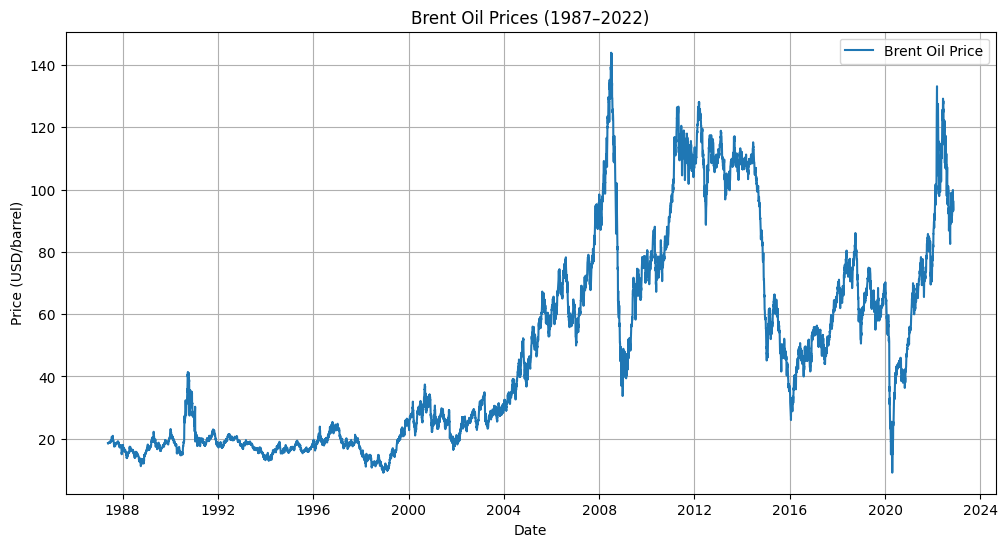

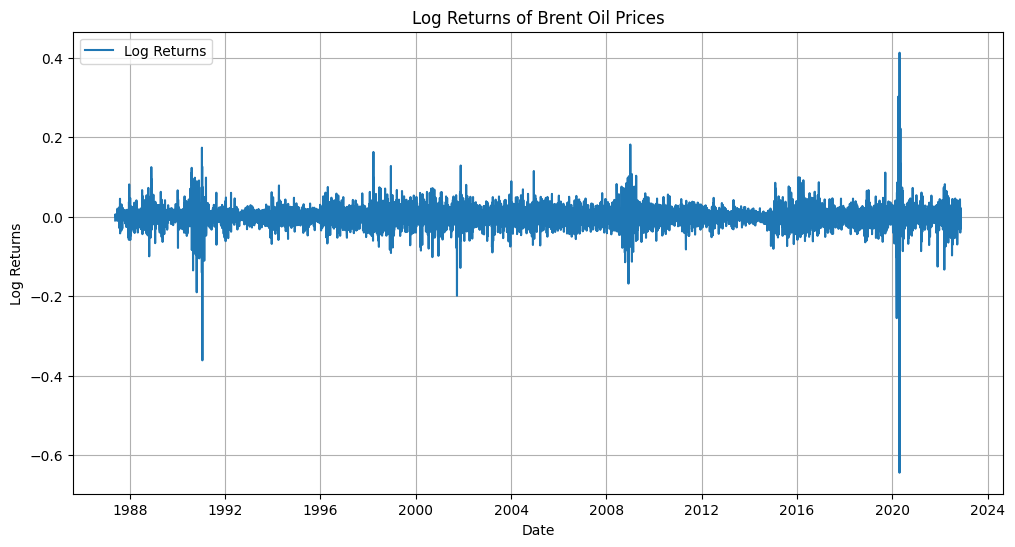

ADF Statistic (Price): -1.9938560113924675
p-value: 0.28927350489340287
Critical Values: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}

ADF Statistic (Log Returns): -16.427113494485894
p-value: 2.4985801611428892e-29
Critical Valu`es: {'1%': np.float64(-3.4310783342658615), '5%': np.float64(-2.861861876398633), '10%': np.float64(-2.566941329781918)}


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Add the project root directory
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from src.data.data_loader import load_brent_oil_data

# Define paths
RAW_PATH = '../data/raw/BrentOilPrices.csv'
PROCESSED_PATH = '../data/processed/cleaned_oil_data.csv'
FIGURES_PATH = '../results/figures/'

# Load data
df = load_brent_oil_data(RAW_PATH, PROCESSED_PATH)

# Plot raw price series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices (1987–2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid(True)
plt.savefig(f'{FIGURES_PATH}price_series.png')
plt.show()

# Compute log returns
df['Log_Price'] = np.log(df['Price'])
df['Log_Returns'] = df['Log_Price'].diff()

# Plot log returns
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Log_Returns'], label='Log Returns')
plt.title('Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.savefig(f'{FIGURES_PATH}log_returns.png')
plt.show()

# Stationarity test (Augmented Dickey-Fuller)
result = adfuller(df['Price'].dropna())
print('ADF Statistic (Price):', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

result = adfuller(df['Log_Returns'].dropna())
print('\nADF Statistic (Log Returns):', result[0])
print('p-value:', result[1])
print('Critical Valu`es:', result[4])
